In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [115]:
df = pd.read_csv('loan_timing.csv')
df

,days since origination,days from origination to chargeoff
0,109,NaN
1,679,NaN
2,723,NaN
3,509,NaN
4,254,NaN
...,...,...
49995,253,NaN
49996,664,NaN
49997,209,NaN
49998,214,NaN


In [121]:
df_defaulted = df[df['days from origination to chargeoff'].notna()]
df_active = df[df['days from origination to chargeoff'].isna()]

In [122]:
df_defaulted.shape, df_active.shape

((3305, 2), (46695, 2))

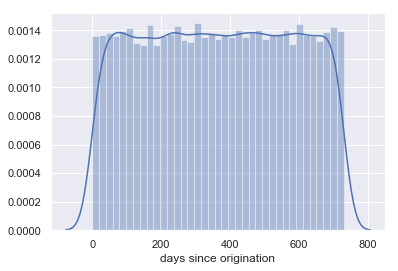

In [196]:
sns.distplot(df['days since origination'])
plt.show()

### Loan distribution looks uniform

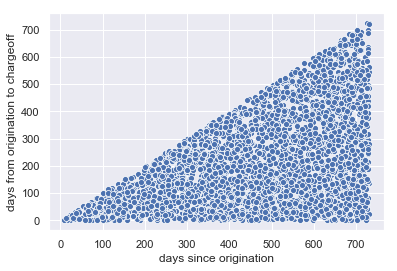

In [129]:
sns.scatterplot(data=df_defaulted, x='days since origination', y='days from origination to chargeoff')
plt.show()

### Observation the scatters looks uniformly distribution

In [130]:
df_defaulted.describe()

,days since origination,days from origination to chargeoff
count,3305.000000,3305.000000
mean,474.198790,214.852345
std,176.942232,165.233874
min,10.000000,0.000000
25%,343.000000,76.000000
50%,501.000000,180.000000
75%,625.000000,323.000000
max,730.000000,725.000000


# Monte Carlo Simulation
The idea is to estimate 3 years default loan from 2 years default loan
Then estimate % of default loan from entire population

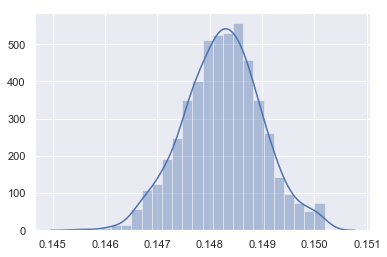

'95% Confidence Interval is (14.68%, 14.97%)'

In [193]:
N = len(df)

def simulate(N):
    df_simulated = pd.DataFrame({
        'days since origination': np.random.randint(0, 3*365, size=100_000),
        'days from origination to chargeoff': np.random.randint(0, 3*365, size=100_000)
    })
    df_defaulted_3yrs = df_simulated[df_simulated['days since origination'] >= df_simulated['days from origination to chargeoff']]
    df_defaulted_2yrs = df_defaulted_3yrs[(df_defaulted_3yrs<=2*365).all(axis=1)]

    estimated_default_3yrs = len(df_defaulted) / len(df_defaulted_2yrs) * len(df_defaulted_3yrs)
    fraction = estimated_default_3yrs/N
    return fraction

fractions = [simulate(N) for _ in range(1000)]
sns.distplot(fractions)
plt.show()

m, s = np.mean(fractions), np.std(fractions)
lower, upper = m-2*s, m+2*s

f"95% Confidence Interval is [{lower:.2%}, {upper:.2%}]"

# Calculating Fraction using Area

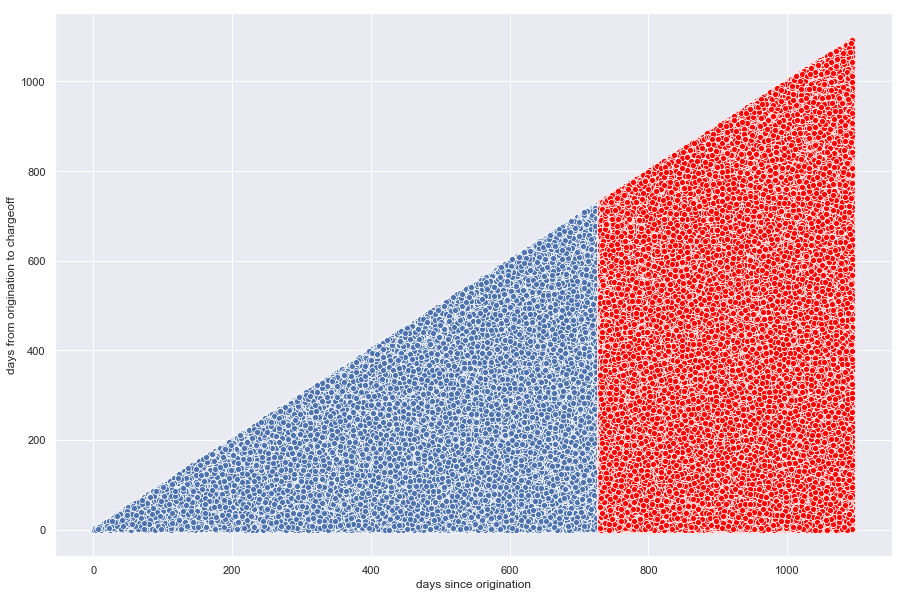

In [169]:
df_simulated = pd.DataFrame({
    'days since origination': np.random.randint(0, 3*365, size=1_000_000),
    'days from origination to chargeoff': np.random.randint(0, 3*365, size=1_000_000)
})
df_simulated = df_simulated[df_simulated['days since origination'] >= df_simulated['days from origination to chargeoff']]
df_simulated.head()

fig, ax = plt.subplots(figsize=(15, 10))
condition_2yrs = (df_simulated <= 730).all(axis=1)
sns.scatterplot(x='days since origination', y='days from origination to chargeoff', ax=ax,
               data=df_simulated[condition_2yrs])
sns.scatterplot(x='days since origination', y='days from origination to chargeoff', ax=ax,
               data=df_simulated[~condition_2yrs], color='red')
plt.show()

In [181]:
# Calculate areas of triangles
area_simulated_3yrs = 1/2 * (3 * 365) ** 2
area_simulated_2yrs = 1/2 * (2 * 365) ** 2

# Estimate default for 3 years
estimated_default_3rs = len(df_defaulted) / area_simulated_2yrs * area_simulated_3yrs

# Fraction of default
fraction = estimated_default_3rs / len(df)
f"{fraction:.2%}"

'14.87%'